In [1]:
# Preamble to make sure we have all packages we need

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')

import seaborn as sns
sns.set_style("white")
sns.set_context("talk",font_scale=1, rc={"lines.linewidth": 2.5})

### Using high-dimensional Normal rv to sample point on surface of sphere

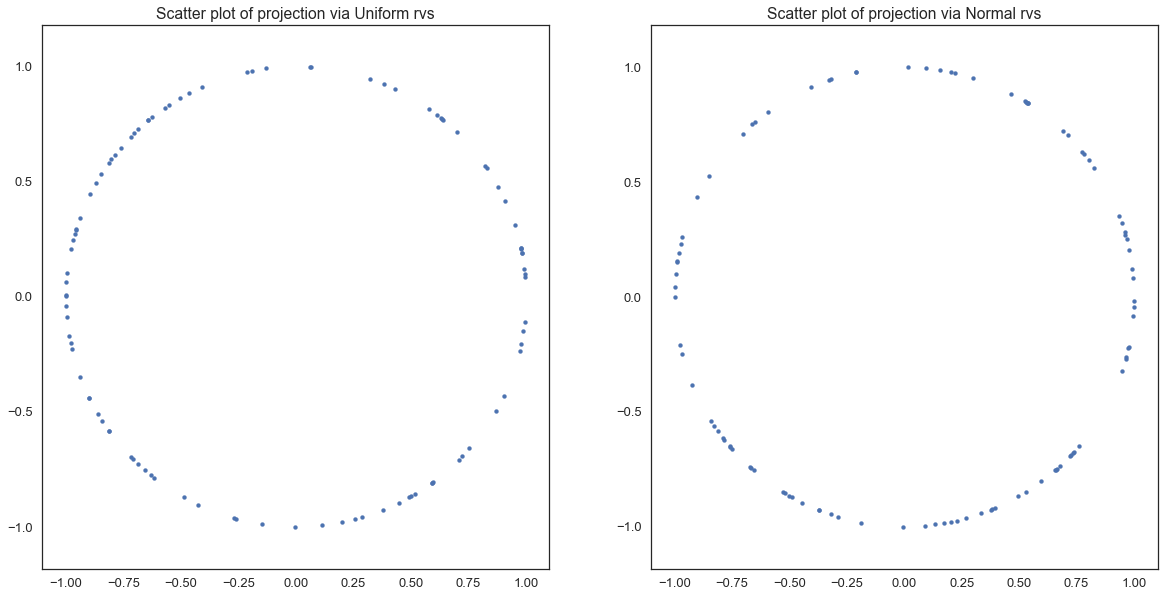

In [20]:
N = 100
d = 2

fig = plt.figure(figsize=(20,10))

X_1 = np.random.uniform(high=1,low=-1,size=(d,N))
X_1 = X_1/np.sqrt(np.sum(X_1**2,0)) 

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_1[0,:],X_1[1,:],s=15)
ax.set_title("Scatter plot of projection via Uniform rvs")
plt.axis('equal')

mean = np.zeros(d); cov = np.eye(d)
X_2 = np.random.multivariate_normal(mean, cov, N).T
X_2 = X_2/np.sqrt(np.sum(X_2**2,0)) 

ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_2[0,:],X_2[1,:],s=15)
ax.set_title("Scatter plot of projection via Normal rvs")
plt.axis('equal')
plt.show()

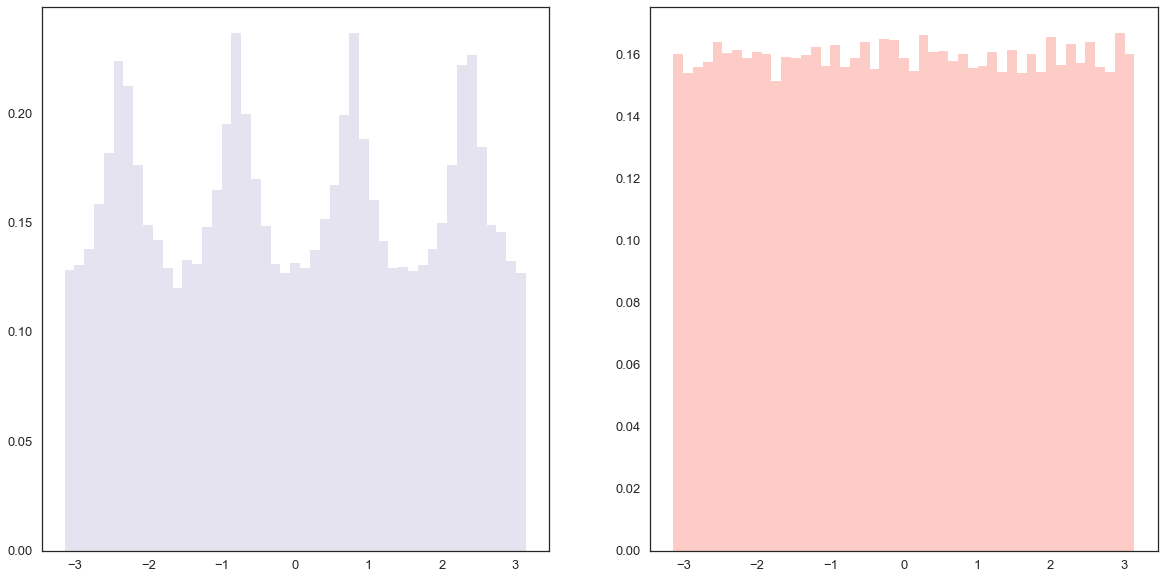

In [24]:
N = 100000
d = 2

X_1 = np.random.uniform(high=1,low=-1,size=(d,N))
X_1 = X_1/np.sqrt(np.sum(X_1**2,0)) 

X_2 = np.random.multivariate_normal(np.zeros(d), np.eye(d), N).T
X_2 = X_2/np.sqrt(np.sum(X_2**2,0)) 


fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1, 2, 1)
sns.distplot(np.arctan2(X_1[1,:],X_1[0,:]),kde=False,norm_hist=True,color=cmap(2))
#ax.set_title("Scatter plot of projection via Uniform rvs")

ax = fig.add_subplot(1, 2, 2)
sns.distplot(np.arctan2(X_2[1,:],X_2[0,:]),kde=False,norm_hist=True,color=cmap(3))
#ax.set_title("Scatter plot of projection via Uniform rvs")

plt.show()

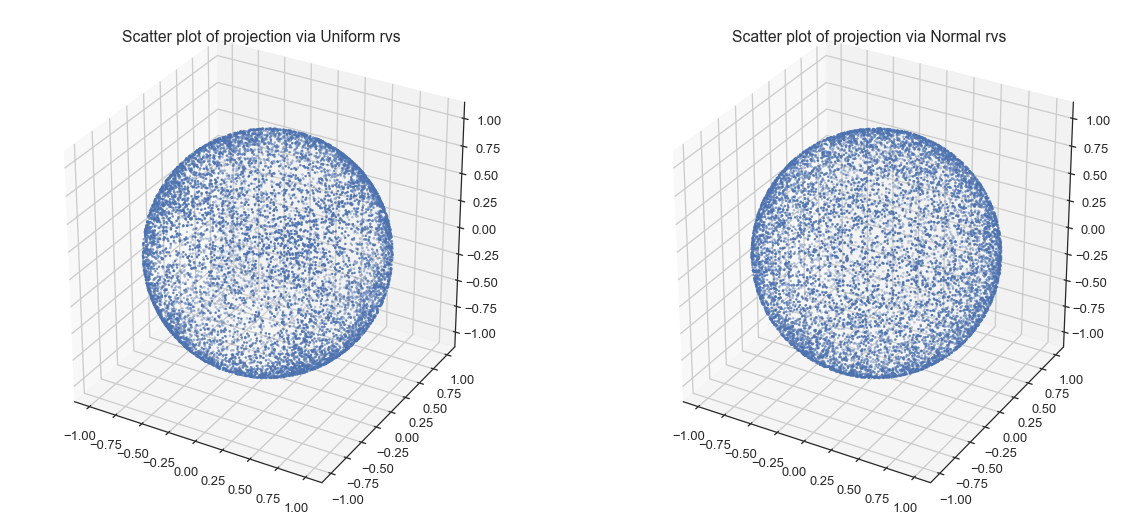

In [3]:
n = 100000
d = 3

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))

mean = np.zeros(d); cov = np.eye(d)
X_1 = np.random.uniform(high=1,low=-1,size=(d,N))
X_1 = X_1/np.sqrt(np.sum(X_1**2,0)) 

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X_1[0,:],X_1[1,:],X_1[2,:],s=4)
ax.set_title("Scatter plot of projection via Uniform rvs")
ax.set_aspect('equal')

ax = fig.add_subplot(1, 2, 2, projection='3d')
mean = np.zeros(d); cov = np.eye(d)
X_2 = np.random.multivariate_normal(mean, cov, N).T
X_2 = X_2/np.sqrt(np.sum(X_2**2,0)) 

ax.scatter(X_2[0,:],X_2[1,:],X_2[2,:],s=4)
ax.set_title("Scatter plot of projection via Normal rvs")
ax.set_aspect('equal')
plt.show()

### Where do high-dimensional Normal rv live?

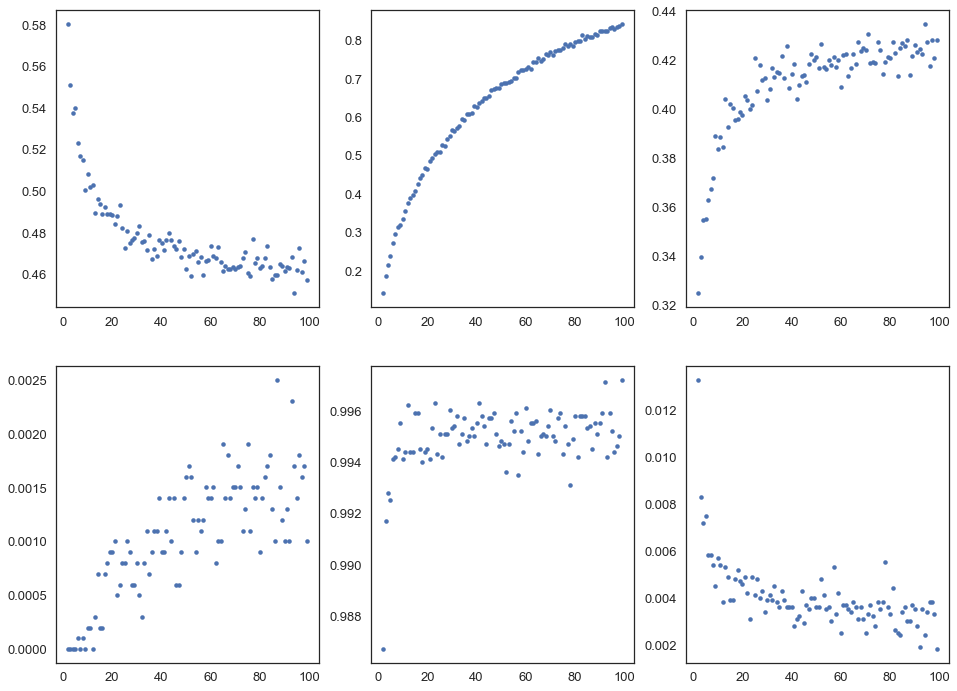

In [31]:
N = 10000
Z_less = []
Z_shell = []
Z_more = []

W_less = []
W_shell = []
W_more = []


eps = 0.1
delta = 2.0

D = np.arange(2,100,1)

for d in D:
    mean = np.zeros(d)  ;  cov = np.eye(d)
    X = np.random.multivariate_normal(mean, cov, N).T
    Y = np.sqrt(np.sum(X**2,0))

    r_hat = np.sqrt(d)
    r_av = np.sqrt(d-1)

    Z_shell.append(np.sum(np.abs(Y-r_hat)<eps*r_hat)/N)
    Z_less.append(np.sum(Y<(r_hat-eps))/N)
    Z_more.append(np.sum(Y>(r_hat+eps))/N)

    W_shell.append(np.sum(np.abs(Y-r_av)<delta)/N)
    W_less.append(np.sum(Y<(r_av-delta))/N)
    W_more.append(np.sum(Y>(r_av+delta))/N)

fig, axes = plt.subplots(2, 3, figsize=(16,12))
axes[0,0].plot(D,Z_less,'.')
axes[0,1].plot(D,Z_shell,'.')
axes[0,2].plot(D,Z_more,'.')
axes[1,0].plot(D,W_less,'.')
axes[1,1].plot(D,W_shell,'.')
axes[1,2].plot(D,W_more,'.')
plt.show()